In [1]:
from libaries import *
from data_denoising import *
from data_loading import findFiles,LoadDataSignals
from global_parameters import *
from peak_to_peak_detection import *
from time_synchronization import *

#### Extract relevant files for processing


In [2]:
expected_waveform="sin"
expected_periods="9"
unique_file_list= findFiles(expected_waveform,expected_periods,sample_number=1)
print(unique_file_list)

['/Users/madhviasthana/Documents/Bio-Medical-Signal-Processing/dataset/4th_March_1percent/0000mg/25DegreeTemperature4March-ram-WaterSugar_mid_solution-0mg-sin9-pure_water_solution_1.mat', '/Users/madhviasthana/Documents/Bio-Medical-Signal-Processing/dataset/4th_March_1percent/51000mg/25DegreeTemperature4March-ram-WaterSugar_mid_solution-51000mg-sin9-pure_water_solution_1.mat', '/Users/madhviasthana/Documents/Bio-Medical-Signal-Processing/dataset/4th_March_1percent/187000mg/25DegreeTemperature4March-ram-WaterSugar_mid_solution-187000mg-sin9-pure_water_solution_1.mat', '/Users/madhviasthana/Documents/Bio-Medical-Signal-Processing/dataset/4th_March_1percent/153000mg/25DegreeTemperature4March-ram-WaterSugar_mid_solution-153000mg-sin9-pure_water_solution_1.mat', '/Users/madhviasthana/Documents/Bio-Medical-Signal-Processing/dataset/4th_March_1percent/85000mg/25DegreeTemperature4March-ram-WaterSugar_mid_solution-85000mg-sin9-pure_water_solution_1.mat', '/Users/madhviasthana/Documents/Bio-Medi

In [3]:
raw,Concentration,actual_waveform,periods=LoadDataSignals(unique_file_list[0],time_axis_start=0,time_axis_end=16000)


Detailed Analysis of File: 0000mg (sin9)]


In [4]:
raw.shape

(100, 2, 16000)

In [5]:
find_start_index(raw[0,1,:], threshold=500000)

[1274,
 1306,
 1330,
 1355,
 1380,
 1405,
 1430,
 1455,
 1480,
 1747,
 2360,
 2533,
 8209,
 8235,
 8259,
 8284,
 8309,
 8335,
 8360,
 8385,
 8410,
 8435,
 8463]

In [6]:
reference_points=find_reference_points_transmit_start(raw,threshold=150000)

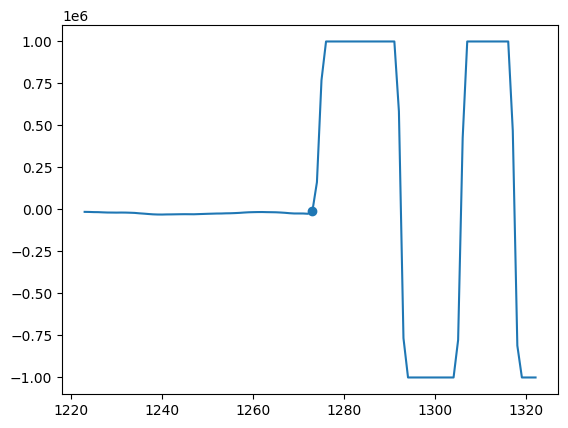

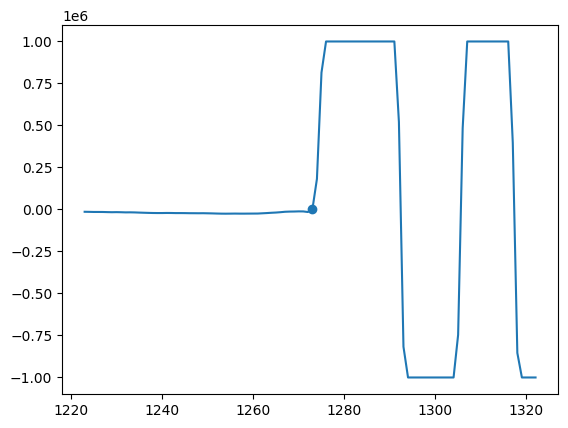

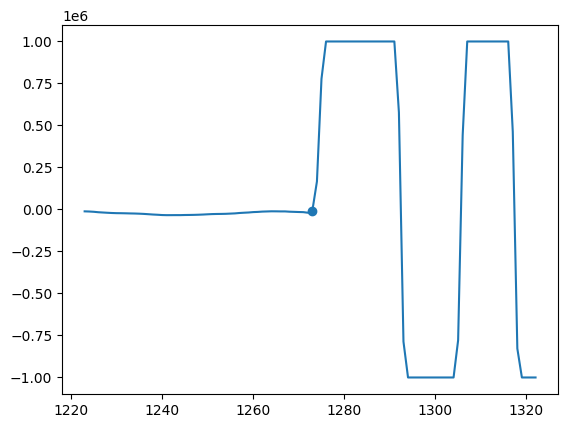

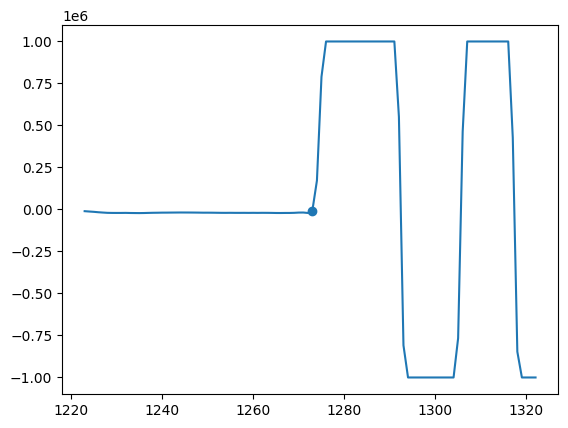

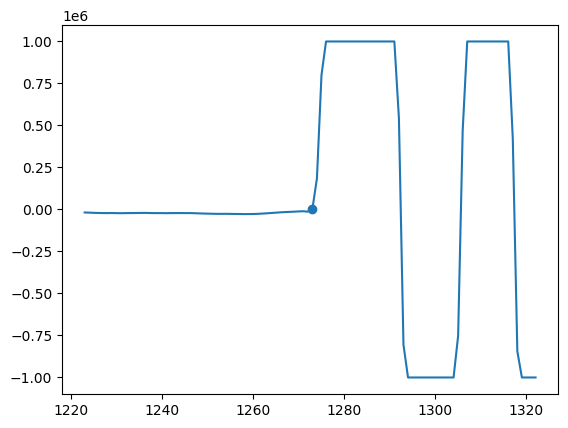

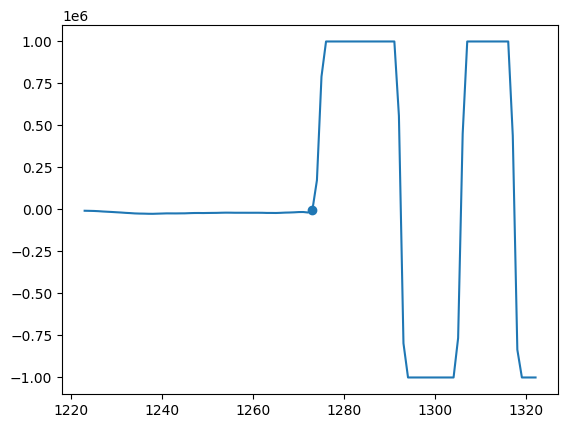

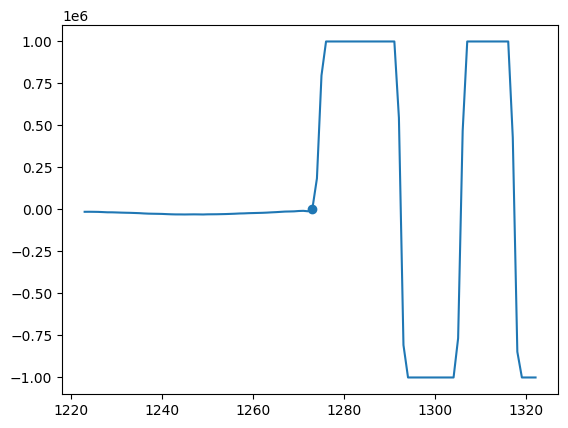

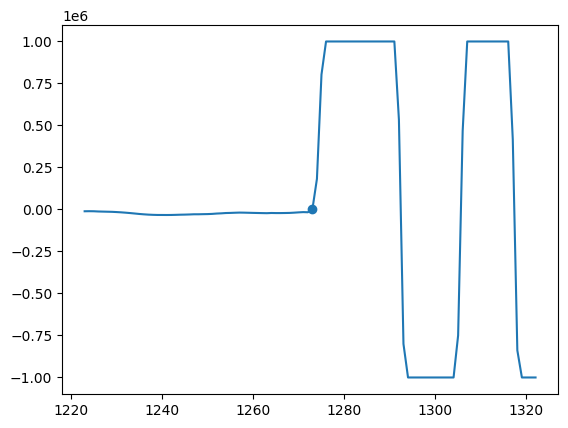

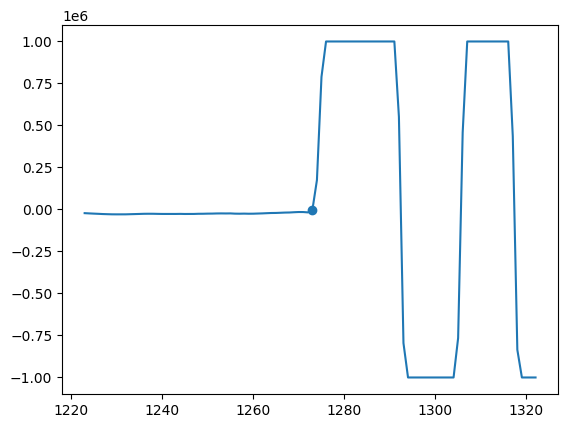

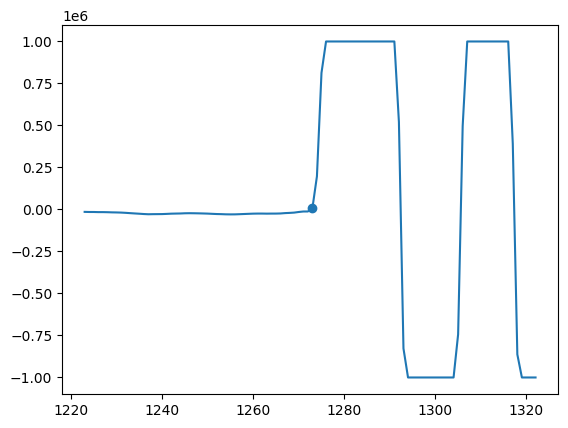

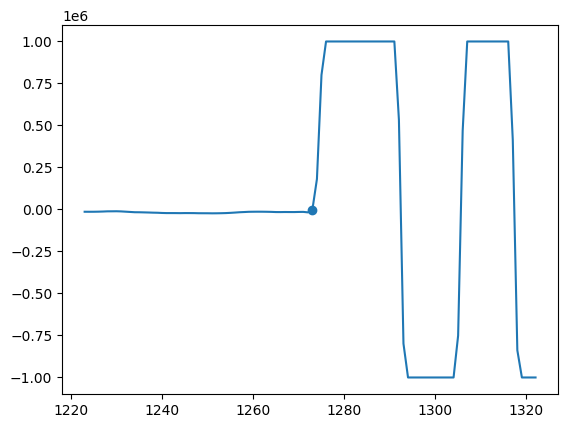

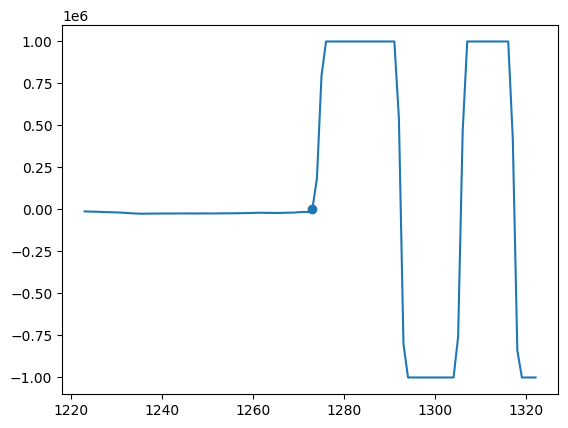

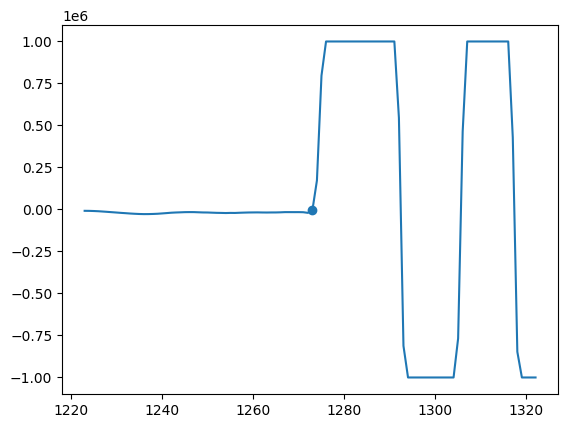

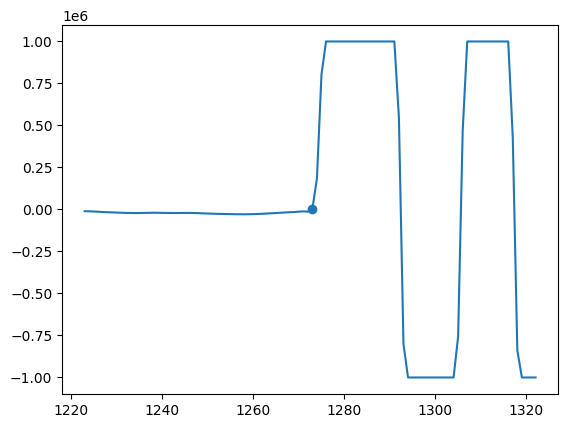

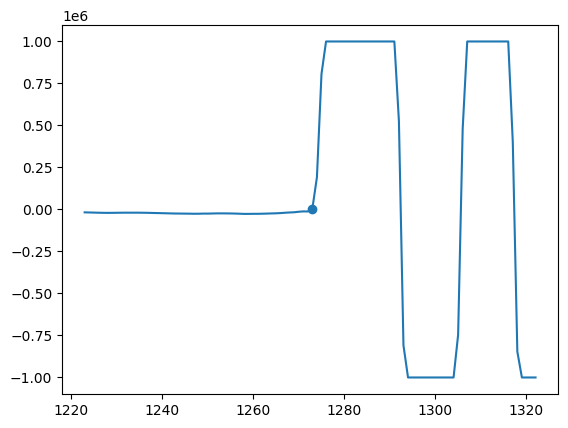

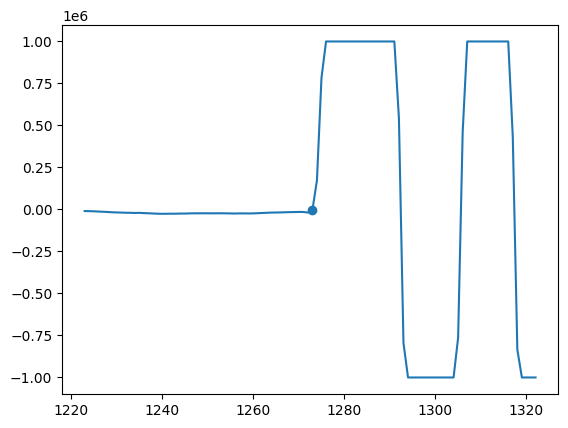

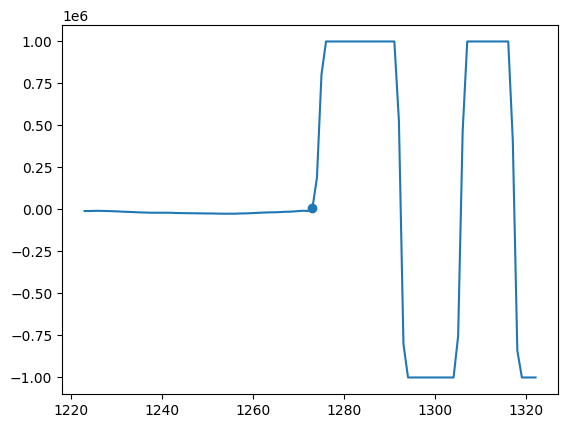

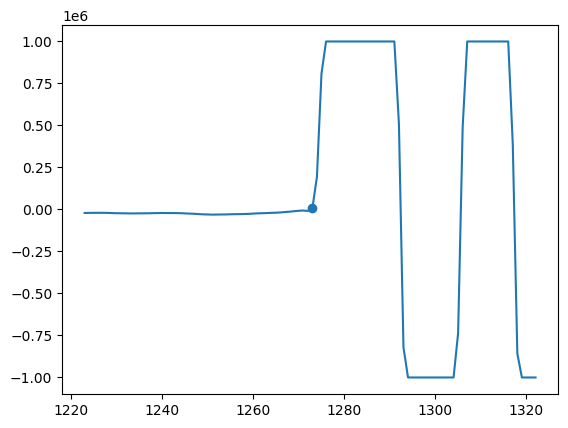

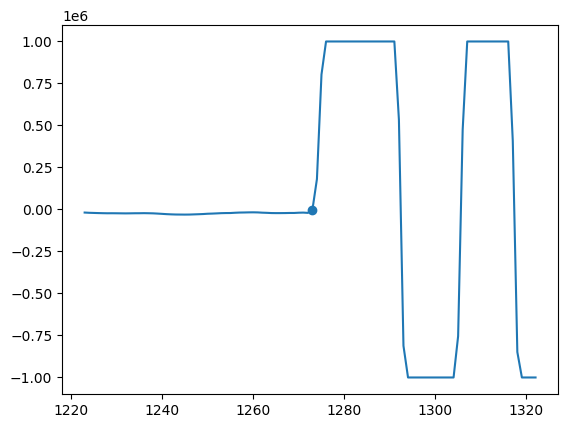

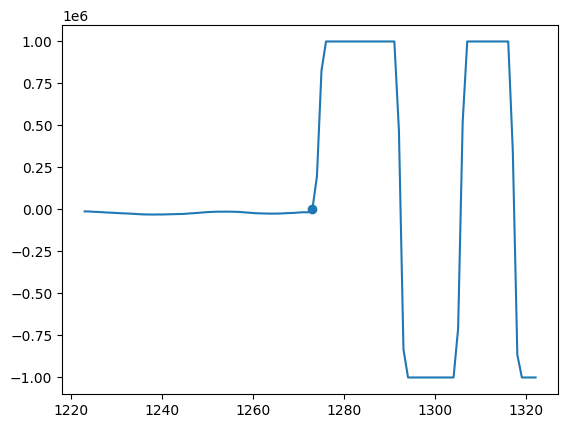

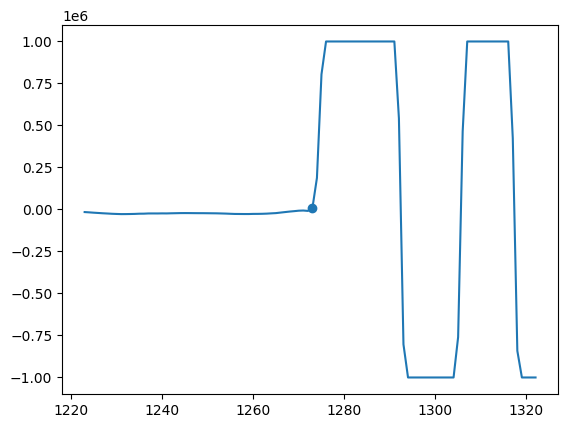

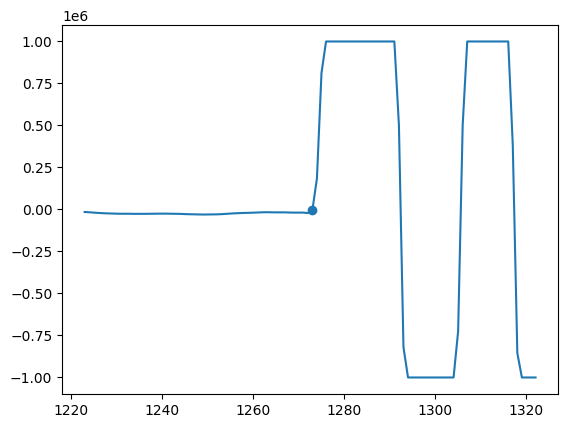

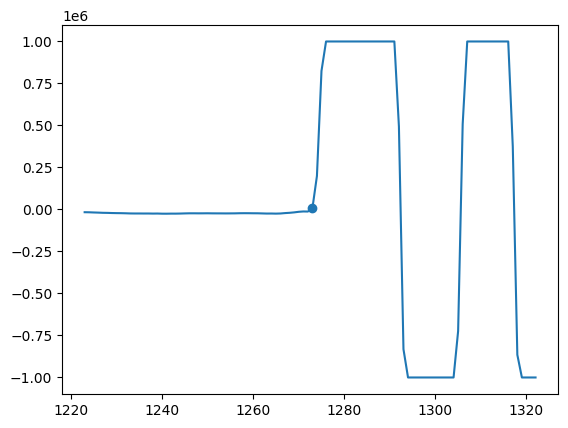

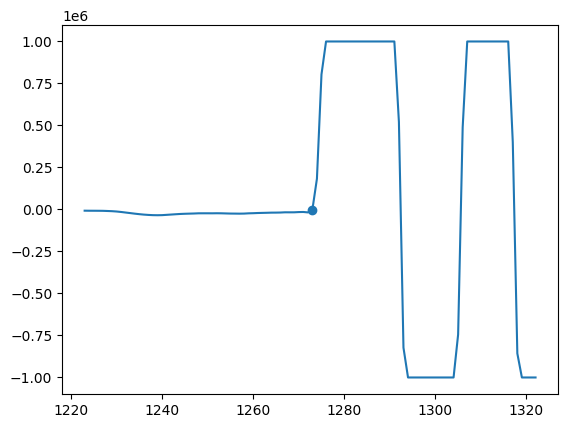

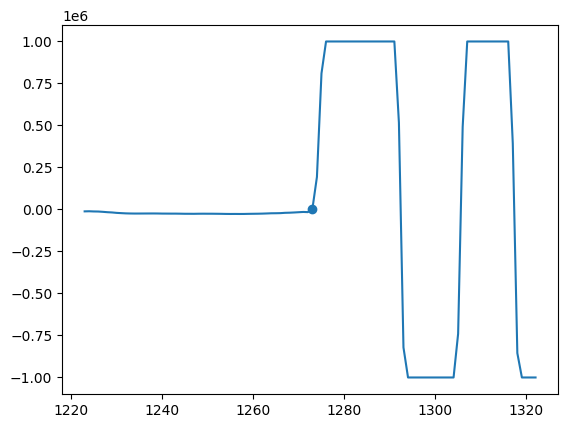

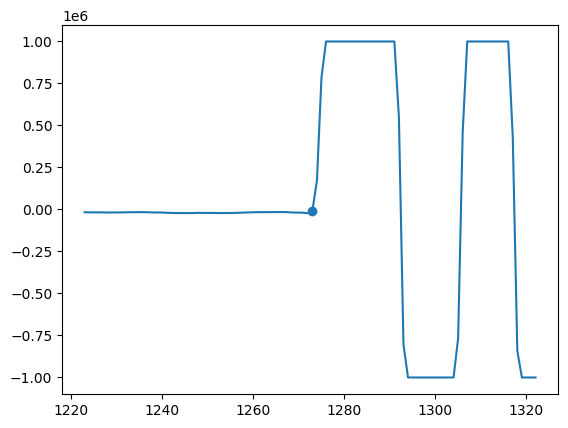

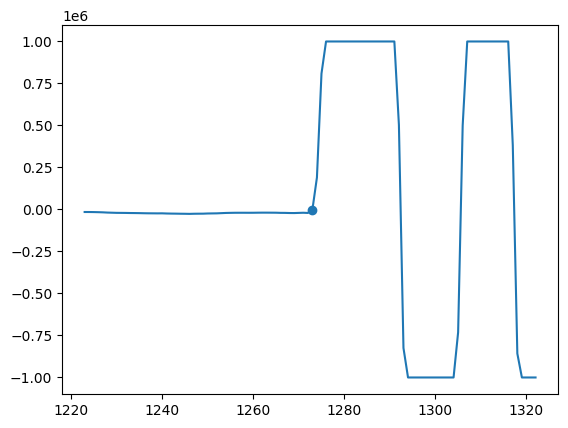

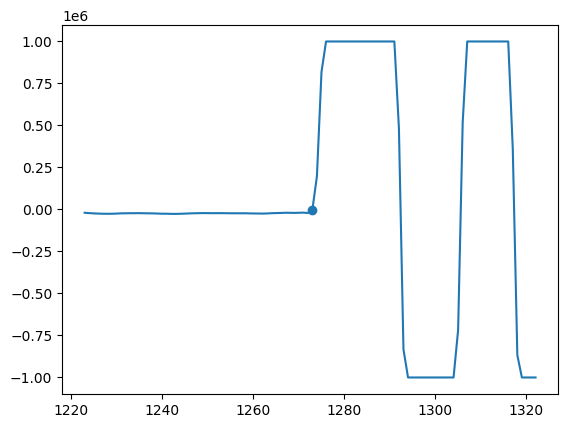

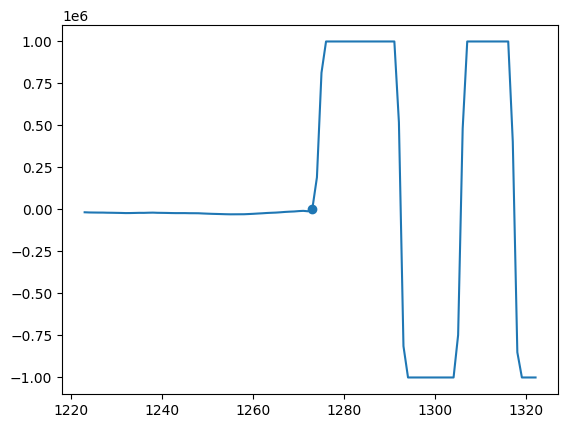

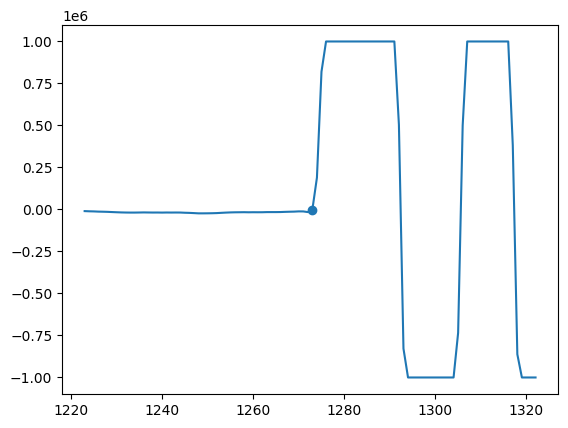

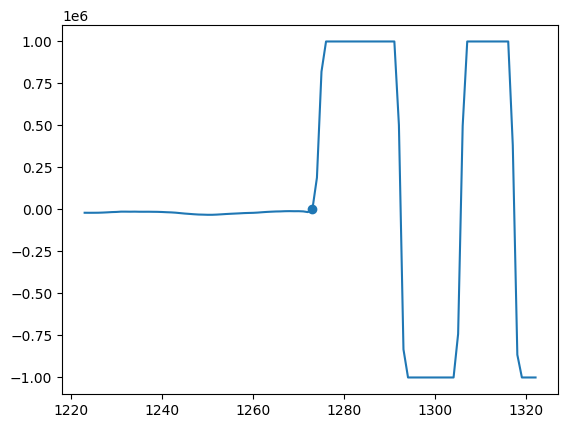

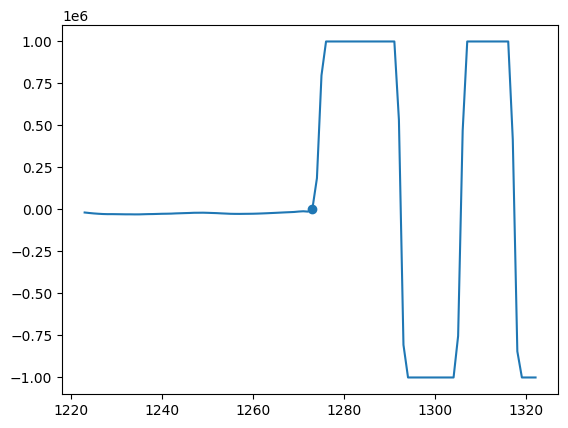

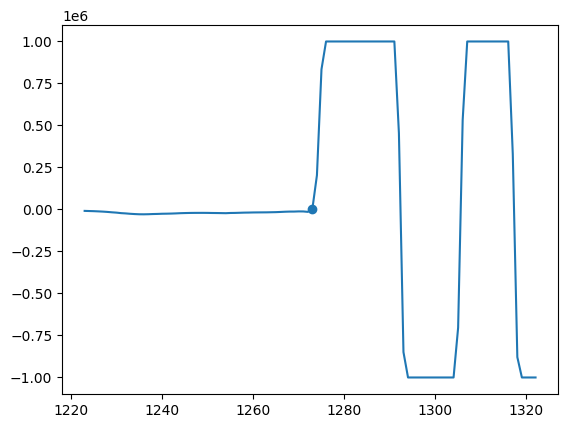

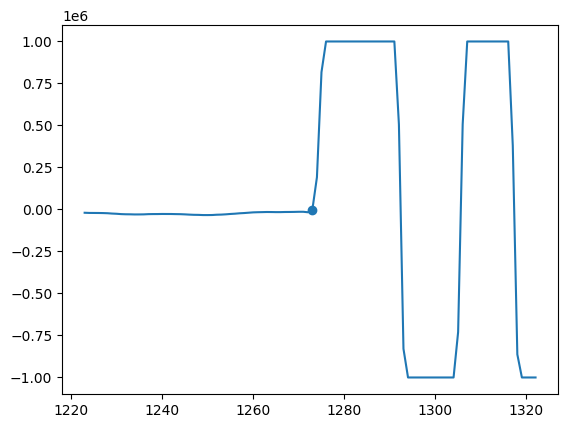

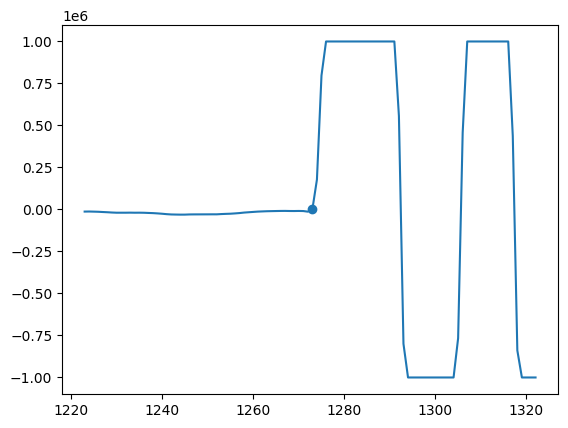

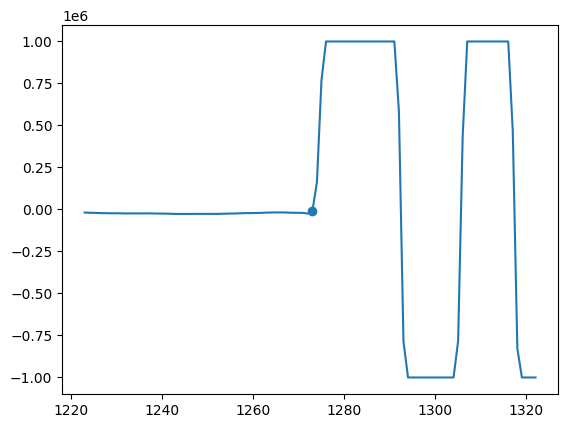

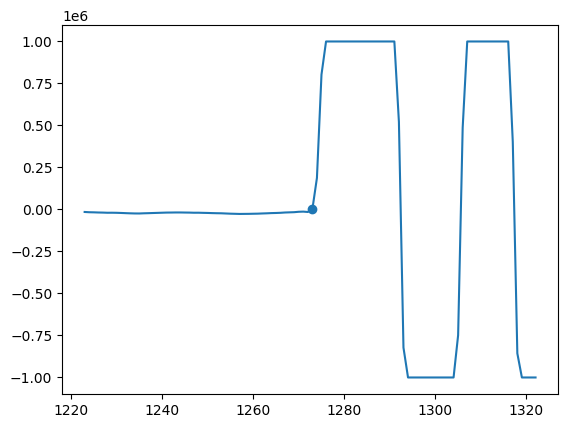

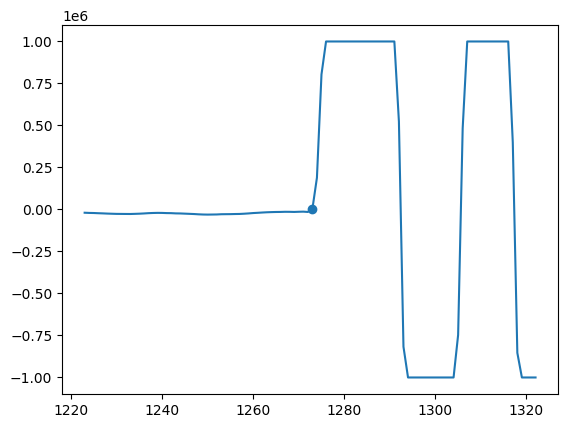

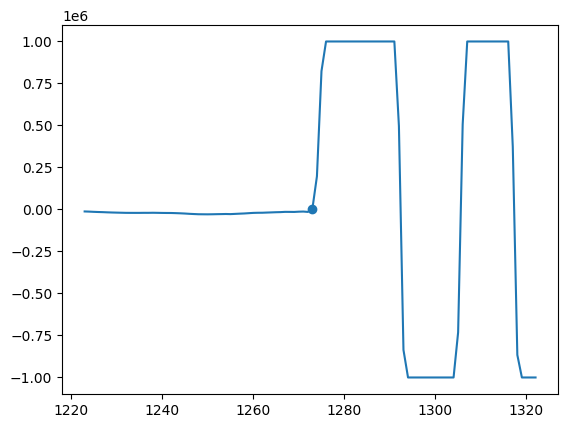

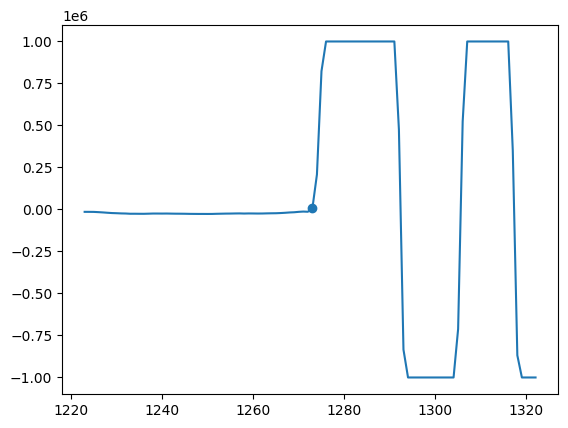

In [7]:
buffer = 50
for i in range(raw.shape[0]):
    current_ref_point = reference_points[i]
    if  current_ref_point != 0 :
        time_range=np.arange(current_ref_point - buffer,current_ref_point + buffer)
        plt.plot(time_range,raw[i,1,current_ref_point - buffer:current_ref_point + buffer])
        plt.scatter(current_ref_point , raw[i,1,current_ref_point])
        plt.show()

In [8]:
reference_points[20] = 1280

In [9]:
#  Max of all ref point 

max(reference_points)

1280

In [10]:
np.unique(reference_points)

array([   0, 1273, 1280])

In [11]:
synchronized_averaging(raw,threshold=500000)

array([[ 2095.31, -2354.71,  2110.32, ..., 74253.81, 72725.53, 66666.71]],
      shape=(1, 16000))